<a href="https://colab.research.google.com/github/Hariharadevi/hari/blob/main/FLIGHTDELAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount(mountpoint, force_remount=False, timeout_ms=120000, readonly=False)>

In [63]:
import numpy as np
import pandas as pd
import pandas as contact
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [3]:
dataset= pd.read_csv("/content/flightdata.csv")
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [5]:
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME", "DEP_DEL15", "ARR_DEL15"]]
dataset.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [6]:
dataset[dataset.isnull().any(axis=1)].head(10)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,NaN
179,86,1,10,7,MSP,DTW,1632,NaN,NaN
184,557,1,10,7,MSP,DTW,912,0.0,NaN
210,1096,1,10,7,DTW,MSP,1303,NaN,NaN
478,1542,1,22,5,SEA,JFK,723,NaN,NaN
481,1795,1,22,5,ATL,JFK,2014,NaN,NaN
491,2312,1,22,5,MSP,JFK,2149,NaN,NaN
499,423,1,23,6,JFK,ATL,1600,NaN,NaN
500,425,1,23,6,JFK,ATL,1827,NaN,NaN
501,427,1,23,6,JFK,SEA,1053,NaN,NaN


In [7]:
dataset['DEP_DEL15'].mode()

0    0.0
Name: DEP_DEL15, dtype: float64

In [8]:
dataset = dataset.fillna({'ARR_DEL15': 1})
dataset = dataset.fillna({'DEP_DEL15': 0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [9]:
import math
for index,row in dataset.iterrows():
  dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME']/100)
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [11]:
dataset.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [12]:
dataset['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

In [13]:
dataset = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [14]:
x=dataset.iloc[:, 0:8].values
y=dataset.iloc[:, 8:9].values

In [15]:
x

array([[1.399e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.476e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.597e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.823e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.901e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.005e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [16]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()

In [17]:
z

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
t

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [19]:
dataset.describe()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,1334.325617,6.628973,15.790758,3.960199,15.067314,0.141483,0.139168,0.276022,0.195975,0.122340,0.225982,0.179681,0.286795,0.196866,0.116820,0.221975,0.177544
std,811.875227,3.354678,8.782056,1.995257,5.023534,0.348535,0.346138,0.447048,0.396967,0.327693,0.418246,0.383939,0.452285,0.397648,0.321219,0.415593,0.382146
min,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,624.000000,4.000000,8.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1267.000000,7.000000,16.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2032.000000,9.000000,23.000000,6.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2853.000000,12.000000,31.000000,7.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


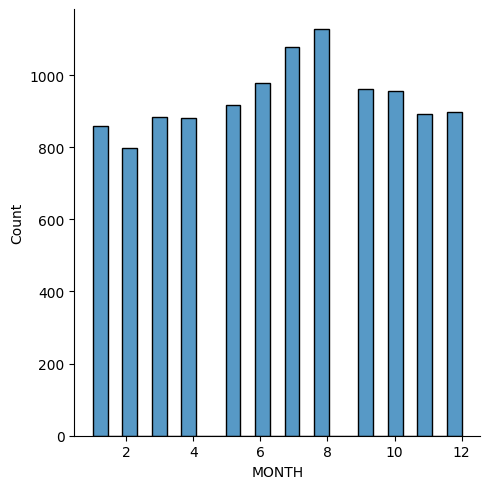

In [20]:
sns.displot(dataset.MONTH)

<Axes: xlabel='ARR_DEL15', ylabel='DEP_DEL15'>

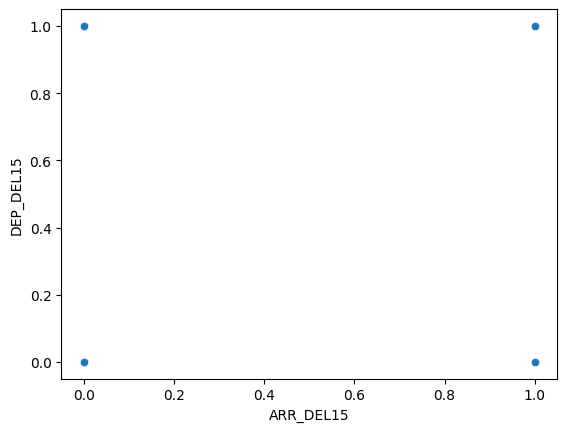

In [21]:
sns.scatterplot(x='ARR_DEL15',y='DEP_DEL15',data=dataset)

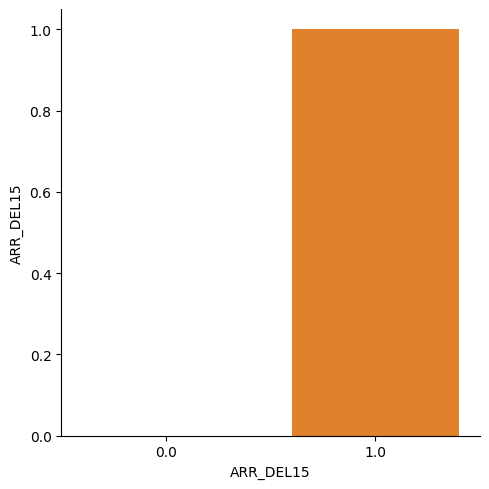

In [22]:
sns.catplot(x="ARR_DEL15",y="ARR_DEL15",kind='bar',data=dataset)

<Axes: >

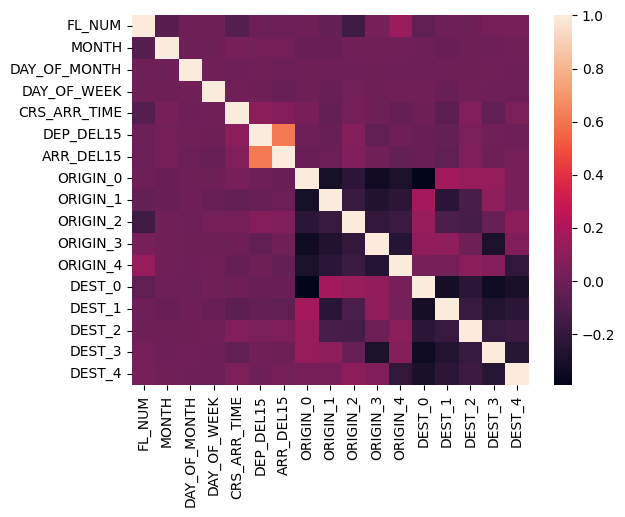

In [23]:
sns.heatmap(dataset.corr())

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_test.shape

(2247, 8)

In [26]:
x_train.shape

(8984, 8)

In [27]:
y_test.shape

(2247, 1)

In [28]:
y_train.shape

(8984, 1)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
decisiontree = classifier.predict(x_test)

In [32]:
decisiontree

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [33]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test,decisiontree)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [35]:
rfc.fit(x_train,y_train)

<ipython-input-35-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [36]:
rfc.fit(x_train,y_train)

<ipython-input-36-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [37]:
y_predict = rfc.predict(x_test)

In [38]:
import tensorflow
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  

In [39]:
Classification = Sequential()
Classification.add(Dense(30,activation='relu'))
Classification.add(Dense(128,activation='relu'))
Classification.add(Dense(64,activation='relu'))
Classification.add(Dense(32,activation='relu'))
Classification.add(Dense(1,activation='sigmoid'))

In [40]:
Classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
Classification.fit(x_train,y_train,batch_size=4,validation_split=0.2,epochs=100)

Epoch 1/100
1797/1797 [==============================] - 6s 3ms/step - loss: 0.4359 - accuracy: 0.8024 - val_loss: 0.4142 - val_accuracy: 0.8125
Epoch 2/100
1797/1797 [==============================] - 5s 3ms/step - loss: 0.4211 - accuracy: 0.8024 - val_loss: 0.4099 - val_accuracy: 0.8125
Epoch 3/100
1797/1797 [==============================] - 5s 3ms/step - loss: 0.4184 - accuracy: 0.8026 - val_loss: 0.4054 - val_accuracy: 0.8125
Epoch 4/100
1797/1797 [==============================] - 4s 2ms/step - loss: 0.4155 - accuracy: 0.8019 - val_loss: 0.4102 - val_accuracy: 0.8125
Epoch 5/100
1797/1797 [==============================] - 5s 3ms/step - loss: 0.4106 - accuracy: 0.8024 - val_loss: 0.4044 - val_accuracy: 0.8114
Epoch 6/100
1797/1797 [==============================] - 5s 3ms/step - loss: 0.4047 - accuracy: 0.8034 - val_loss: 0.4019 - val_accuracy: 0.8114
Epoch 7/100
1797/1797 [==============================] - 4s 2ms/step - loss: 0.3943 - accuracy: 0.8112 - val_loss: 0.3946 - val_ac

In [42]:
y_pred = classifier.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
(y_pred)

[0]


array([0], dtype=uint8)

In [43]:
y_pred = rfc.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
(y_pred)

[0]


array([0], dtype=uint8)

In [44]:
Classification.save('flight.h5')

In [45]:
y_pred = Classification.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [46]:
y_pred

array([[0.9999329 ],
       [0.001969  ],
       [0.        ],
       ...,
       [0.1678162 ],
       [0.        ],
       [0.56437033]], dtype=float32)

In [47]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [48]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [51]:
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

In [64]:
dfs = []
models = [
           ('RF', RandomForestClassifier()),
           ('DecisionTree',DecisionTreeClassifier()),
           ('ANN',MLPClassifier())
         ]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['no delay', 'delay']
for name, model in models:
       kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
       cv_results = model_selection.cross_validate(model,x_train,y_train,cv=kfold,scoring=scoring)
       clf = model.fit(x_train, y_train)
       y_pred = clf.predict(x_test)
       print(name)
       print(classification_report(y_test, y_pred, target_names=target_names))
       results.append(cv_results)
       names.append(name)
       this_df = pd.DataFrame(cv_results)
       this_df['model'] = name
       dfs.append(this_df)
final = pd.contact(dfs, ignore_index=True)
return final

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

RF
              precision    recall  f1-score   support

    no delay       0.90      0.98      0.94      1802
       delay       0.87      0.54      0.67       445

    accuracy                           0.89      2247
   macro avg       0.89      0.76      0.80      2247
weighted avg       0.89      0.89      0.88      2247

DecisionTree
              precision    recall  f1-score   support

    no delay       0.99      1.00      0.99      1802
       delay       0.98      0.97      0.98       445

    accuracy                           0.99      2247
   macro avg       0.99      0.98      0.98      2247
weighted avg       0.99      0.99      0.99      2247



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

ANN
              precision    recall  f1-score   support

    no delay       0.81      0.99      0.89      1802
       delay       0.67      0.09      0.16       445

    accuracy                           0.81      2247
   macro avg       0.74      0.54      0.53      2247
weighted avg       0.79      0.81      0.75      2247



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AttributeError: ignored

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[1773,   29],
       [ 217,  228]])

In [68]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test,decisiontree)

In [69]:
desacc

0.9893190921228304

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,decisiontree)

In [71]:
cm

array([[1790,   12],
       [  12,  433]])

In [73]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print('the accuracy for ANN model is: {}%'.format(score*100))

the accuracy for ANN model is: 81.08589230084557%


In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1782,   20],
       [ 405,   40]])

In [78]:
parameters = {
                'n_estimators' : [1,20,30,55,68,74,90,120,115],
                'criterion':['gini','entropy'],
                'max_features' : ["auto", "sqrt", "log2"],
         'max_depth' : [2,5,8,10], 'verbose' : [1,2,3,4,6,8,9,10]
}

In [86]:
from flask import Flask,request,render_template
import numpy as np
import pandas as pd
import pickle
import os

In [91]:
model = pickle.load(open('flight.h5','rb'))

app = Flask(_name_)

UnpicklingError: ignored

In [95]:
@app.route('/')
def home():
  return render_template("index.html")
@app.route('/prediction',methods =['POST'])

SyntaxError: ignored

In [100]:
from flask.templating import render_template
def predict():
  name = request.form['name']
  month = request.form['month']
  dayofmonth = request.form['dayofmonth']
  origin = request.form['origin']
  if(origin == "msp"):
    origin1,origin2,origin3,origin4,origin5 = 0,0,0,0,1
  if(origin == "dtw"):
    origin1,origin2,origin3,origin4,origin5 = 1,0,0,0,0
  if(origin == "jfk"):
    origin1,origin2,origin3,origin4,origin5 = 0,0,1,0,0
  if(origin == "sea"):
    origin1,origin2,origin3,origin4,origin5 = 0,1,0,0,0
  if(origin == "alt"):
    origin1,origin2,origin3,origin4,origin5 = 0,0,0,1,0
  destination = request.form['destination']
  if(destination == "msp"):
    destination1,destination2,destination3,destination4,destination5 = 0,0,0,0,1
  if(destination == "dtw"):
    destination1,destination2,destination3,destination4,destination5 = 1,0,0,0,0
  if(destination == "jfk"):
    destination1,destination2,destination3,destination4,destination5 = 0,0,1,0,0
  if(destination == "alt"):
    destination1,destination2,destination3,destination4,destination5 = 0,0,0,1,0
dept  = request.form['dept']
arrtime = request.form['arrtime']
actdept = request.form['actdept']
dept15=int(dept)-int(actdept)
total = [[name,month,dayofmonth,dayofweek,origin1,origin2,origin3,origin4,origin5,destination1,destination2,destination3,destination4,destination5]]
y_pred = model.predict(total)
print(y_pred)
if(y_pred==[0.]):
  ans="the flight willbe on time"
else:
  ans="the flight will be delayed"
return render_template("index.html",showcase = ans)

RuntimeError: ignored

In [103]:
if_name_== '_main__':
  app.run(debug = True)

SyntaxError: ignored